# 🧪 H(e,e′p) Elastic Analysis — Detector Offset Runs

In this notebook, we analyze a series of **H(e,e′p)** elastic *singles* runs to extract detector offsets. Each run corresponds to a specific spectrometer setting. The High Momentum Spectrometer (HMS) is used to detect the scattered electron or proton depending on the configuration, and the goal is to refine offset parameters such as angles and momentum calibration for improved reconstruction accuracy.

---

## 📋 Run Details

| Setting | Run(s)            | Beam Energy (GeV) | HMS Angle (deg) | HMS Central Momentum (GeV) |
|--------:|-------------------|------------------:|-----------------:|----------------------------:|
| 1       | 1249              | 10.5439           | 12.395           | 6.117                       |
| 2       | 1250              | 10.5436           | 19.260           | 6.117                       |
| 3       | 1251, 1252        | 10.5433           | 20.700           | 6.117                       |
| 4       | 1253              | 10.5435           | 20.700(check)           | 6.117                       |
| 5       | 1534              | 10.5437           | 19.145           | 6.667                       |
| 6       | 1535              | 10.5437           | 17.995           | 6.667                       |
| 7       | 1536              | 10.5436           | 16.850           | 6.667                       |
| 8       | 1714              | 10.5440           | 22.830           | 5.878                       |
| 9       | 1715, 1716        | 10.5440           | 21.680           | 5.878                       |
| 10      | 6705, 6828–6840   | 6.3972            | 24.860           | 4.042                       |

---

## 🛠️ Analysis Goals

- Perform elastic peak fitting to extract the momentum and angle offsets.
- Compare reconstructed kinematics with expected elastic kinematics.
- Optimize detector calibration parameters based on residuals.
- Cross-check offsets across different settings and beam energies.

---

## 📐 Formulae and Kinematic Relations

*To be included later.*

---

📌 *Note: Ensure that the appropriate HMS polarity and acceptance settings are used for each run group.*


In [1]:
import pandas as pd

# Define the elastic settings and placeholder values for dw
data = [
    [1, "1249",           10.54386781, 12.395, 6.117, None, None],
    [2, "1250",           10.54364850, 19.260, 6.117, None, None],
    [3, "1251",           10.54330237, 19.260, 6.117, None, None],
    [4, "1252",           10.54346881, 20.700, 6.117, None, None],
    [5, "1253",           10.54353183, 22.120, 6.117, None, None],
    [6, "1534",           10.54371873, 19.145, 6.667, None, None],
    [7, "1535",           10.54366713, 17.995, 6.667, None, None],
    [8, "1536",           10.54363166, 16.850, 6.667, None, None],
    [9, "1714",           10.54402191, 22.830, 5.878, None, None],
    [10, "1715, 1716",     10.5440, 21.680, 5.878, None, None],
    [11, "6828–6840",     6.3972, 24.860, 4.042, None, None]
]

# Column names for the CSV
columns = ["Setting", "Runs", "Beam_E_GeV", "HMS_Angle_deg", "HMS_P0_GeV", "dW_meas", "Residual"]

# Create DataFrame
df_settings = pd.DataFrame(data, columns=columns)

# Save to CSV
df_settings.to_csv("settings.csv", index=False)

# Display the DataFrame
df_settings


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual
0,1,1249,10.543868,12.395,6.117,None,None
1,2,1250,10.543648,19.260,6.117,None,None
2,3,1251,10.543302,19.260,6.117,None,None
3,4,1252,10.543469,20.700,6.117,None,None
4,5,1253,10.543532,22.120,6.117,None,None
5,6,1534,10.543719,19.145,6.667,None,None
6,7,1535,10.543667,17.995,6.667,None,None
7,8,1536,10.543632,16.850,6.667,None,None
8,9,1714,10.544022,22.830,5.878,None,None
9,10,"1715, 1716",10.544000,21.680,5.878,None,None


## 🧮 Proton Kinematics Calculation from Beam and Electron Scattering Data

This section computes the **proton scattering angle** and **momentum** in elastic H(e,e'p) events using basic two-body kinematics.

### ✏️ Inputs:
- Beam energy $ E_{\text{beam}} $
- Scattered electron angle \( \theta_e \)
- Scattered electron momentum \( P_e \)

### 📤 Outputs:
- Proton scattering angle \( \theta_p \)
- Proton momentum \( P_p \)
- Computed electron momentum from elastic kinematics $ P_e^{\text{elastic}} $

The calculation uses energy-momentum conservation under the assumption of elastic scattering off a stationary proton.

---


In [2]:
import math

def calculate_proton_properties(beam_energy, electron_angle, electron_momentum):
    """
    Calculate the proton angle and momentum based on elastic kinematics.

    Parameters:
    beam_energy (float): Beam energy in GeV.
    electron_angle (float): Scattered electron angle θ_e in degrees.
    electron_momentum (float): Measured scattered electron momentum P_e in GeV.

    Returns:
    tuple: (Proton angle θ_p in degrees, proton momentum P_p in GeV, calculated elastic P_e in GeV)
    """
    mass_e = 0.000511  # GeV
    mass_p = 0.938272  # GeV

    initial_momentum = math.sqrt(beam_energy**2 - mass_e**2)
    theta_e_rad = math.radians(electron_angle)

    pe_elastic = initial_momentum / (1 + (2 * initial_momentum / mass_p) * (math.sin(theta_e_rad / 2))**2)

    tan_theta_p = (pe_elastic * math.sin(theta_e_rad)) / (initial_momentum - pe_elastic * math.cos(theta_e_rad))
    theta_p = math.atan(tan_theta_p)
    theta_p_deg = math.degrees(theta_p)

    pp = math.sqrt((initial_momentum + mass_p - pe_elastic)**2 - mass_p**2)

    return theta_p_deg, pp, pe_elastic


In [3]:
import pandas as pd

# Load the settings CSV
df = pd.read_csv("settings.csv")

# Lists to store results
proton_angles = []
proton_momenta = []
pe_kin_calc = []

# Loop over each row and compute kinematics
for _, row in df.iterrows():
    beam_E = row["Beam_E_GeV"]
    theta_e = row["HMS_Angle_deg"]
    pe_measured = row["HMS_P0_GeV"]

    theta_p, pp, pe_calc = calculate_proton_properties(beam_E, theta_e, pe_measured)
    
    proton_angles.append(theta_p)
    proton_momenta.append(pp)
    pe_kin_calc.append(pe_calc)

# Add new columns to DataFrame
df["Proton_Angle_deg"] = proton_angles
df["Proton_P_GeV"] = proton_momenta
df["Electron_P_GeV"] = pe_kin_calc

# Show and save updated table
df.to_csv("settings_with_kinematics.csv", index=False)
df


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV
0,1,1249,10.543868,12.395,6.117,NaN,NaN,36.961912,2.982732,8.355313
1,2,1250,10.543648,19.260,6.117,NaN,NaN,25.715849,4.920539,6.472723
2,3,1251,10.543302,19.260,6.117,NaN,NaN,25.716524,4.920319,6.472593
3,4,1252,10.543469,20.700,6.117,NaN,NaN,24.106061,5.288494,6.110658
4,5,1253,10.543532,22.120,6.117,NaN,NaN,22.688132,5.633526,5.770677
5,6,1534,10.543719,19.145,6.667,NaN,NaN,25.852658,4.890434,6.502362
6,7,1535,10.543667,17.995,6.667,NaN,NaN,27.297711,4.583160,6.803723
7,8,1536,10.543632,16.850,6.667,NaN,NaN,28.886560,4.267684,7.112294
8,9,1714,10.544022,22.830,5.878,NaN,NaN,22.033810,5.799436,5.607448
9,10,"1715, 1716",10.544000,21.680,5.878,NaN,NaN,23.110141,5.528918,5.874305


# Starting the analysis

In [4]:
# === Define setting-to-SIMC mapping ===
setting_to_simcfile = {
    1: "eep_hydrogen_1249.root",
    2: "eep_hydrogen_1250.root",
    3: "eep_hydrogen_1251.root",
    4: "eep_hydrogen_1252.root",
    5: "eep_hydrogen_1253.root",
    6: "eep_hydrogen_1534.root",
    7: "eep_hydrogen_1535.root",
    8: "eep_hydrogen_1536.root",
    9: "eep_hydrogen_1714.root",
    10: "eep_hydrogen_1715_1716.root",  # you may average 1715+1716 or pick one
    11: "eep_hydrogen_6828_6841.root",  # or a merged file
}

# === Normalization factors for SIMC (normfac / nevents) ===
normfac_map = {
    1: 0.166473E+08,
    2: 0.163935E+08,
    3: 0.164131E+08,
    4: 0.164131E+08,
    5: 0.165000E+08,
    6: 0.170000E+08,
    7: 0.170000E+08,
    8: 0.170000E+08,
    9: 0.168886E+08,
    10: 0.163935E+08,
    11: 0.672355E+07
}

# === Effective charge in millicoulombs (after all efficiency corrections) ===
effective_charge_map = {
    1: 39.5321,
    2: 39.5321,
    3: 35.1559,
    4: 23.715,
    5: 53.3532,
    6: 65.000,
    7: 70.000,
    8: 68.000,
    9: 68.8866,
    10: (99.026 + 79.0843),  # merged
    11: 34.4342 + 37.3549 + 38.8534 + 40.5628 + 34.9966 + 33.6797 + 46.9562 + 31.9774 + 41.2885 + 5.69914 + 40.4742 + 35.1548 + 35.5669  # sum for 6828-6840
}

# Total number of SIMC events (same across files typically)
nevents_simc = 100000


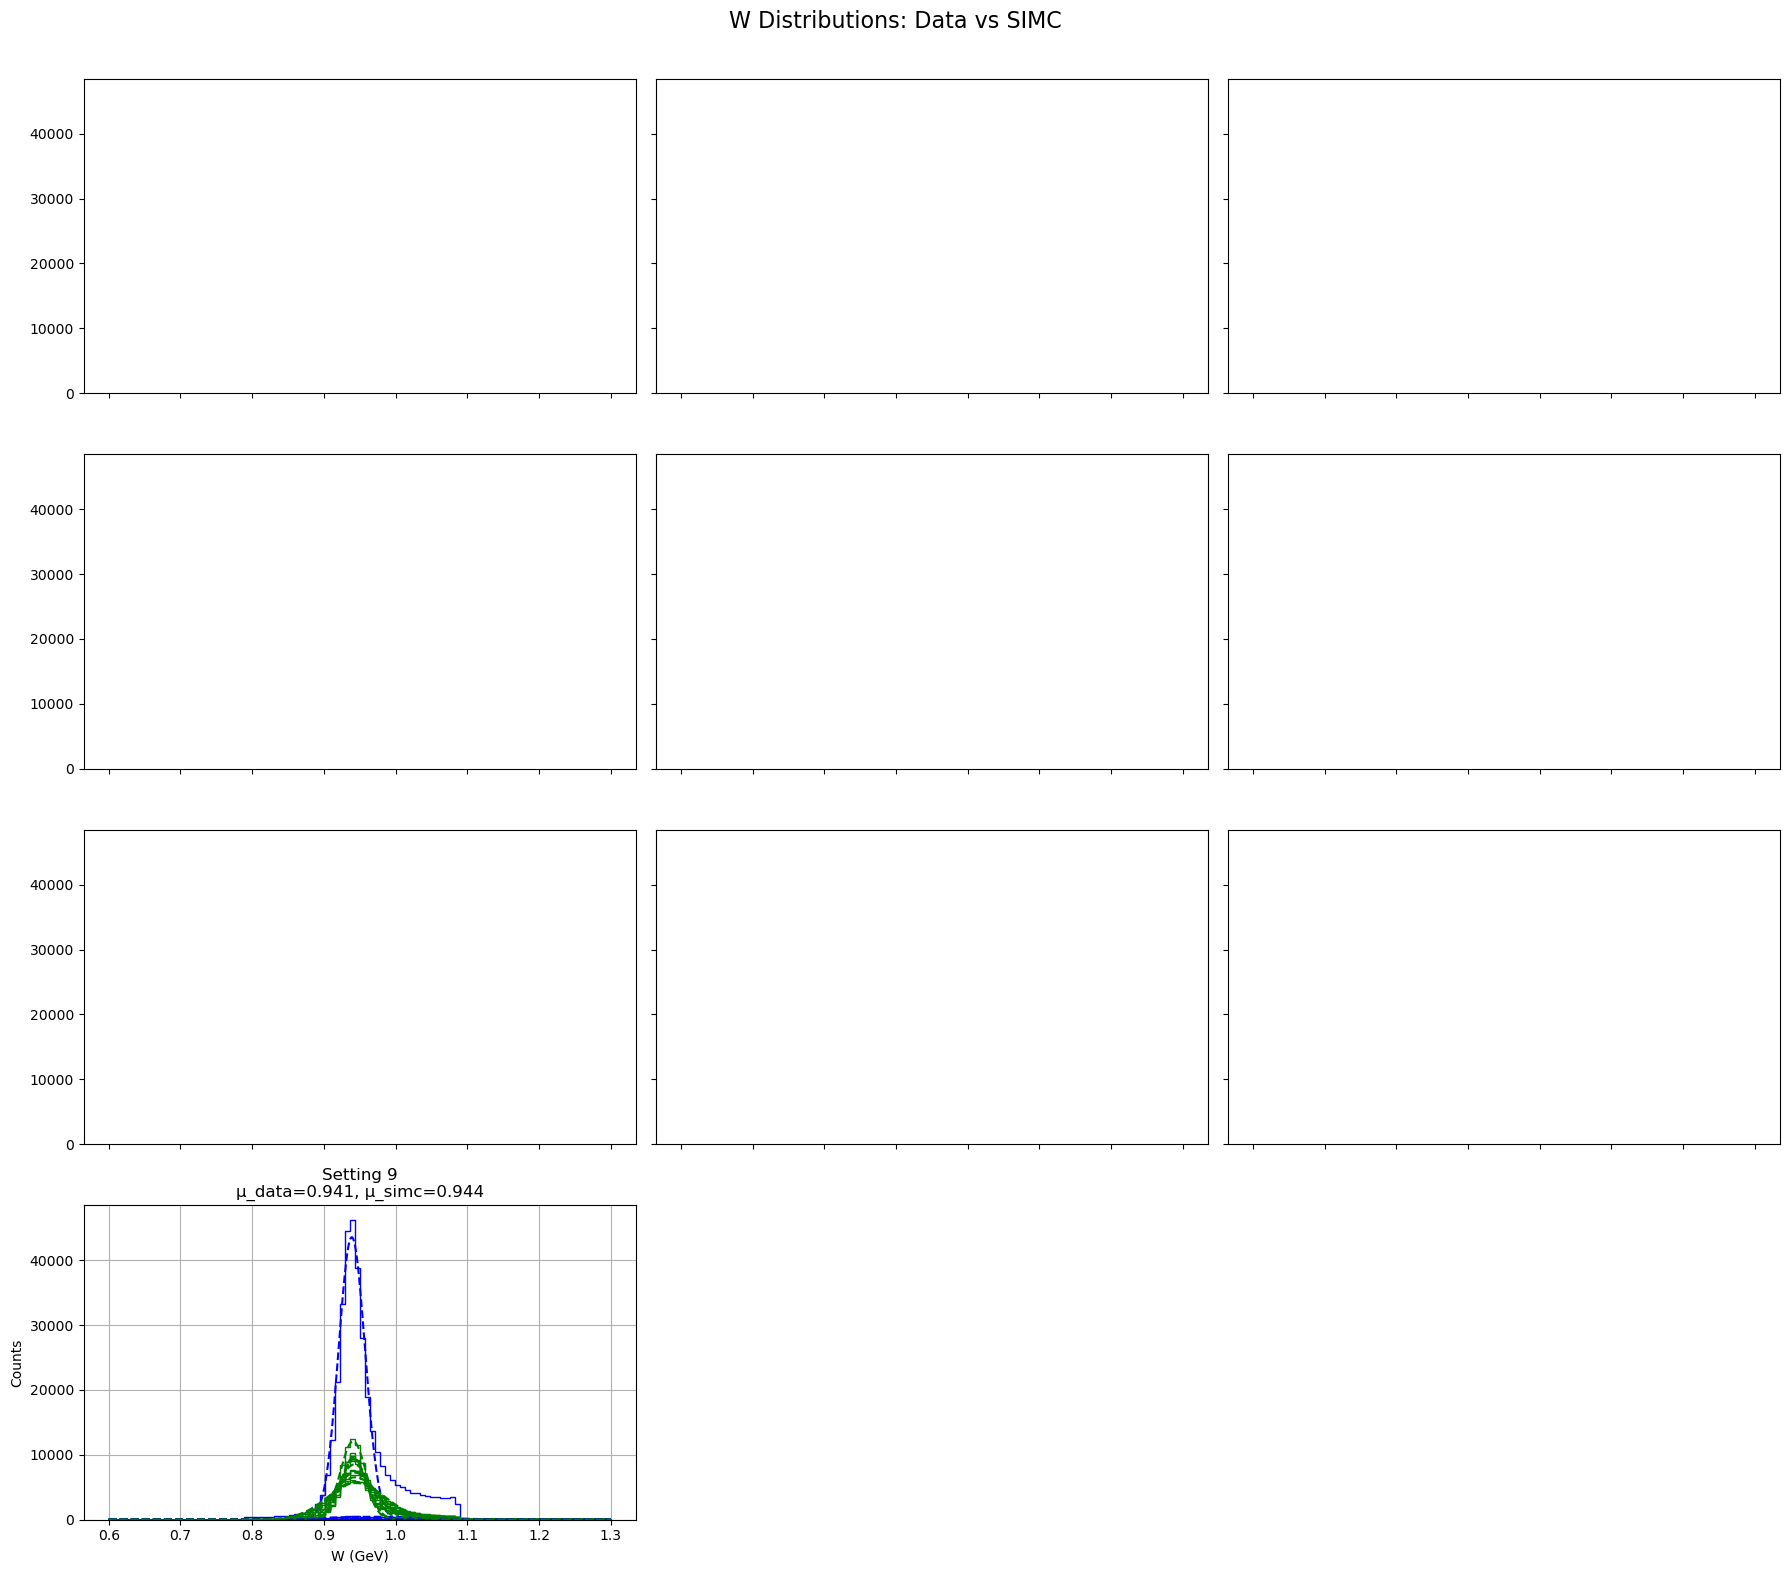

Updated CSV saved to settings_with_kinematics.csv
Analysis complete. Multi-panel plot and sorted CSV saved.


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV,mu_data,mu_simc,dWmeas,sigma_data,sigma_simc
0,1,1249,10.543868,12.395,6.117,NaN,NaN,36.961912,2.982732,8.355313,NaN,NaN,NaN,NaN,NaN
1,2,1250,10.543648,19.260,6.117,NaN,NaN,25.715849,4.920539,6.472723,0.936915,0.941502,-0.004588,0.018948,0.018673
2,3,1251,10.543302,19.260,6.117,NaN,NaN,25.716524,4.920319,6.472593,0.947823,0.941500,0.006323,0.024242,0.018672
3,4,1252,10.543469,20.700,6.117,NaN,NaN,24.106061,5.288494,6.110658,0.948964,0.943126,0.005838,0.030050,0.028076
4,5,1253,10.543532,22.120,6.117,NaN,NaN,22.688132,5.633526,5.770677,0.997596,0.945476,0.052119,0.101045,0.040713
5,6,1534,10.543719,19.145,6.667,NaN,NaN,25.852658,4.890434,6.502362,0.949286,0.943567,0.005719,0.028800,0.033021
6,7,1535,10.543667,17.995,6.667,NaN,NaN,27.297711,4.583160,6.803723,0.950793,0.942522,0.008271,0.024643,0.023176
7,8,1536,10.543632,16.850,6.667,NaN,NaN,28.886560,4.267684,7.112294,0.951209,0.941168,0.010041,0.023102,0.017255
8,9,1714,10.544022,22.830,5.878,NaN,NaN,22.033810,5.799436,5.607448,0.941034,0.944469,-0.003434,0.034747,0.038650
9,10,"1715, 1716",10.544000,21.680,5.878,NaN,NaN,23.110141,5.528918,5.874305,0.972154,0.943319,0.028836,0.084048,0.028200


In [15]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
import pandas as pd


# === Settings ===
data_dir = "./data/merged_elastics"
simc_dir = "./data/simc"
output_dir = "diagnostic_plots"
os.makedirs(output_dir, exist_ok=True)

# === Gaussian fit function ===
def gauss(x, A, mu, sigma):
    return A * np.exp(- (x - mu)**2 / (2 * sigma**2))

# === Extract W values from ROOT file using uproot ===
# def extract_w(filename, branch="W", selection=None):
#     with uproot.open(filename) as f:

#         if branch == "H.kin.W":
#             tree = f["T"]
#             data = tree.arrays([branch, "H.cal.etottracknorm", "H.cer.npeSum",
#                                 "H.gtr.th", "H.gtr.ph"], library="np")
#             W = data[branch]
        
#             mask = (abs(data["H.kin.W"] - 0.938) < 0.15) & (data["H.cal.etottracknorm"] > 0.9) & (data["H.cer.npeSum"]>0.5) & (abs(data["H.gtr.th"])<0.09) & (abs(data["H.gtr.ph"])<0.055)
#             if selection is not None:
#                 mask &= selection(data)
#             return W[mask]
        
#         if branch == "W":
#             tree = f["h10"]
#             simc = tree.arrays([branch, "hsxptar", "hsyptar"], library="np")
#             W = simc[branch]
        
#             mask = (abs(simc["W"] - 0.938) < 0.15) & (abs(simc["hsxptar"]) < 0.09) & (abs(simc["hsyptar"]) < 0.055)
#             if selection is not None:
#                 mask &= selection(data)
#             return W[mask]

def extract_w(filename, branch="W", selection=None, normalize=False, normfac=None):
    with uproot.open(filename) as f:
        if branch == "H.kin.W":
            tree = f["T"]
            data = tree.arrays([branch, "H.cal.etottracknorm", "H.cer.npeSum",
                                "H.gtr.th", "H.gtr.ph"], library="np")
            W = data[branch]
            mask = (abs(W - 0.938) < 0.15) & (data["H.cal.etottracknorm"] > 0.9) & \
                   (data["H.cer.npeSum"] > 0.5) & (abs(data["H.gtr.th"]) < 0.09) & \
                   (abs(data["H.gtr.ph"]) < 0.055)
            if selection is not None:
                mask &= selection(data)
            return W[mask]

        elif branch == "W":
            tree = f["h10"]
            simc = tree.arrays([branch, "hsxptar", "hsyptar", "Weight"], library="np")
            W = simc[branch]
            weights = simc["Weight"]
            mask = (abs(W - 0.938) < 0.15) & (abs(simc["hsxptar"]) < 0.09) & (abs(simc["hsyptar"]) < 0.055)

            if selection is not None:
                mask &= selection(simc)

            W_selected = W[mask]
            weights_selected = weights[mask]

            if normalize and normfac:
                full_weights = weights_selected * (normfac / nevents_simc)
                return W_selected, full_weights
            else:
                return W_selected


# === Fit Gaussian to histogram ===
def fit_gaussian(hist_vals, bin_edges):
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    A0 = np.max(hist_vals)
    mu0 = bin_centers[np.argmax(hist_vals)]
    sigma0 = np.std(bin_centers)
    try:
        popt, _ = curve_fit(gauss, bin_centers, hist_vals, p0=[A0, mu0, sigma0])
        return popt  # A, mu, sigma
    except RuntimeError:
        return None

# === Main loop ===
results = []
# === Plot all in subplots ===
ncols = 3
# nrows = int(np.ceil(len(results) / ncols))
nrows = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), sharex=True, sharey=True)
axs = axs.flatten()

for data_file in sorted(glob.glob(f"{data_dir}/merged_setting_*.root")):
    # Extract setting number
    setting = os.path.basename(data_file).split("_")[-1].replace(".root", "")
    if setting.isdigit():
        setting_idx = int(setting)
        if setting_idx not in setting_to_simcfile:
            print(f"Skipping setting {setting}: SIMC mapping not found.")
            continue
        simc_file = os.path.join(simc_dir, setting_to_simcfile[setting_idx])
    else:
        print(f"Invalid setting format: {setting}")
        continue

    
    if not os.path.exists(simc_file):
        print(f"Skipping setting {setting}: SIMC file not found.")
        continue

    # Extract W values
    # data_W = extract_w(data_file, "H.kin.W")
    # simc_W = extract_w(simc_file, "W")

    setting_int = int(setting)

    data_W = extract_w(data_file, "H.kin.W")
    simc_extract = extract_w(simc_file, "W", normalize=True, normfac=normfac_map.get(setting_int, None))

    if isinstance(simc_extract, tuple):
        simc_W, simc_weights = simc_extract
    else:
        simc_W = simc_extract
        simc_weights = np.ones_like(simc_W)  # fallback

    # Histogram parameters
    bins = 100
    range_W = (0.6, 1.3)


    # Normalize histograms
    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, bins_simc = np.histogram(simc_W, bins=bins, range=range_W, weights=simc_weights)

    # Scale data histogram by effective charge
    if setting_int in effective_charge_map:
        eff_charge = effective_charge_map[setting_int]
        hist_data = hist_data / eff_charge


    if len(data_W) == 0 or len(simc_W) == 0:
        print(f"No W entries after cuts for setting {setting}")
        continue


    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, bins_simc = np.histogram(simc_W, bins=bins, range=range_W)

    # Gaussian fits
    fit_data = fit_gaussian(hist_data, bins_data)
    fit_simc = fit_gaussian(hist_simc, bins_simc)

    if fit_data is None or fit_simc is None:
        print(f"Fit failed for setting {setting}")
        continue

    A_data, mu_data, sigma_data = fit_data
    A_simc, mu_simc, sigma_simc = fit_simc

    dWmeas = mu_data - mu_simc

    # Save results
    results.append({
        "setting": setting,
        "mu_data": mu_data,
        "mu_simc": mu_simc,
        "dWmeas": dWmeas,
        "sigma_data": sigma_data,
        "sigma_simc": sigma_simc
    })

    bin_centers = 0.5 * (bins_data[:-1] + bins_data[1:])
    xfit = np.linspace(*range_W, 500)

    ax = axs[i]
    ax.hist(data_W, bins=bins, range=range_W, histtype='step', color='blue', label='Data')
    ax.hist(simc_W, bins=bins, range=range_W, histtype='step', color='green', label='SIMC')
    ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_data, bins_data)), 'b--')
    ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_simc, bins_data)), 'g--')
    
    ax.set_title(f"Setting {setting}\nμ_data={mu_data:.3f}, μ_simc={mu_simc:.3f}")
    ax.grid(True)
    if i % ncols == 0:
        ax.set_ylabel("Counts")
    if i >= len(results) - ncols:
        ax.set_xlabel("W (GeV)")



# === Plot all in subplots ===
# ncols = 3
# nrows = int(np.ceil(len(results) / ncols))
# fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), sharex=True, sharey=True)
# axs = axs.flatten()

# for i, res in enumerate(results):
#     setting = res["setting"]
#     mu_data = res["mu_data"]
#     sigma_data = res["sigma_data"]
#     mu_simc = res["mu_simc"]
#     sigma_simc = res["sigma_simc"]

#     # Recompute histograms for plotting
#     data_file = f"{data_dir}/merged_setting_{setting}.root"
#     simc_file = os.path.join(simc_dir, setting_to_simcfile[int(setting)])
#     data_W = extract_w(data_file, "H.kin.W")
#     simc_W = extract_w(simc_file, "W")
#     hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
#     hist_simc, _ = np.histogram(simc_W, bins=bins, range=range_W)

#     bin_centers = 0.5 * (bins_data[:-1] + bins_data[1:])
#     xfit = np.linspace(*range_W, 500)

#     ax = axs[i]
#     ax.hist(data_W, bins=bins, range=range_W, histtype='step', color='blue', label='Data')
#     ax.hist(simc_W, bins=bins, range=range_W, histtype='step', color='green', label='SIMC')
#     ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_data, bins_data)), 'b--')
#     ax.plot(xfit, gauss(xfit, *fit_gaussian(hist_simc, bins_data)), 'g--')
    
#     ax.set_title(f"Setting {setting}\nμ_data={mu_data:.3f}, μ_simc={mu_simc:.3f}")
#     ax.grid(True)
#     if i % ncols == 0:
#         ax.set_ylabel("Counts")
#     if i >= len(results) - ncols:
#         ax.set_xlabel("W (GeV)")

# Hide unused subplots
for j in range(len(results), len(axs)):
    axs[j].axis('off')

fig.suptitle("W Distributions: Data vs SIMC", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig(f"{output_dir}/W_comparison_all_settings.png")
plt.close()

# === Sort and Save CSV ===
# df = pd.DataFrame(results)
# df["setting"] = df["setting"].astype(int)
# df = df.sort_values("setting")
# df.to_csv(f"{output_dir}/dWmeas_summary.csv", index=False)

# === Merge with original settings CSV and overwrite fit results ===
settings_csv_path = "settings_with_kinematics.csv"  # update path if needed
df_results = pd.DataFrame(results)
df_results["Setting"] = df_results["setting"].astype(int)
df_results.drop(columns=["setting"], inplace=True)

# Load the original settings file
df_settings = pd.read_csv(settings_csv_path)
df_settings["Setting"] = df_settings["Setting"].astype(int)

# Drop old fit columns if they already exist
fit_columns = ["mu_data", "mu_simc", "dWmeas", "sigma_data", "sigma_simc"]
df_settings.drop(columns=[col for col in fit_columns if col in df_settings.columns], inplace=True)

# Merge and save
df_merged = pd.merge(df_settings, df_results, on="Setting", how="left")
df_merged = df_merged.sort_values("Setting")
df_merged.to_csv(settings_csv_path, index=False)

print(f"Updated CSV saved to {settings_csv_path}")
print("Analysis complete. Multi-panel plot and sorted CSV saved.")
df_merged

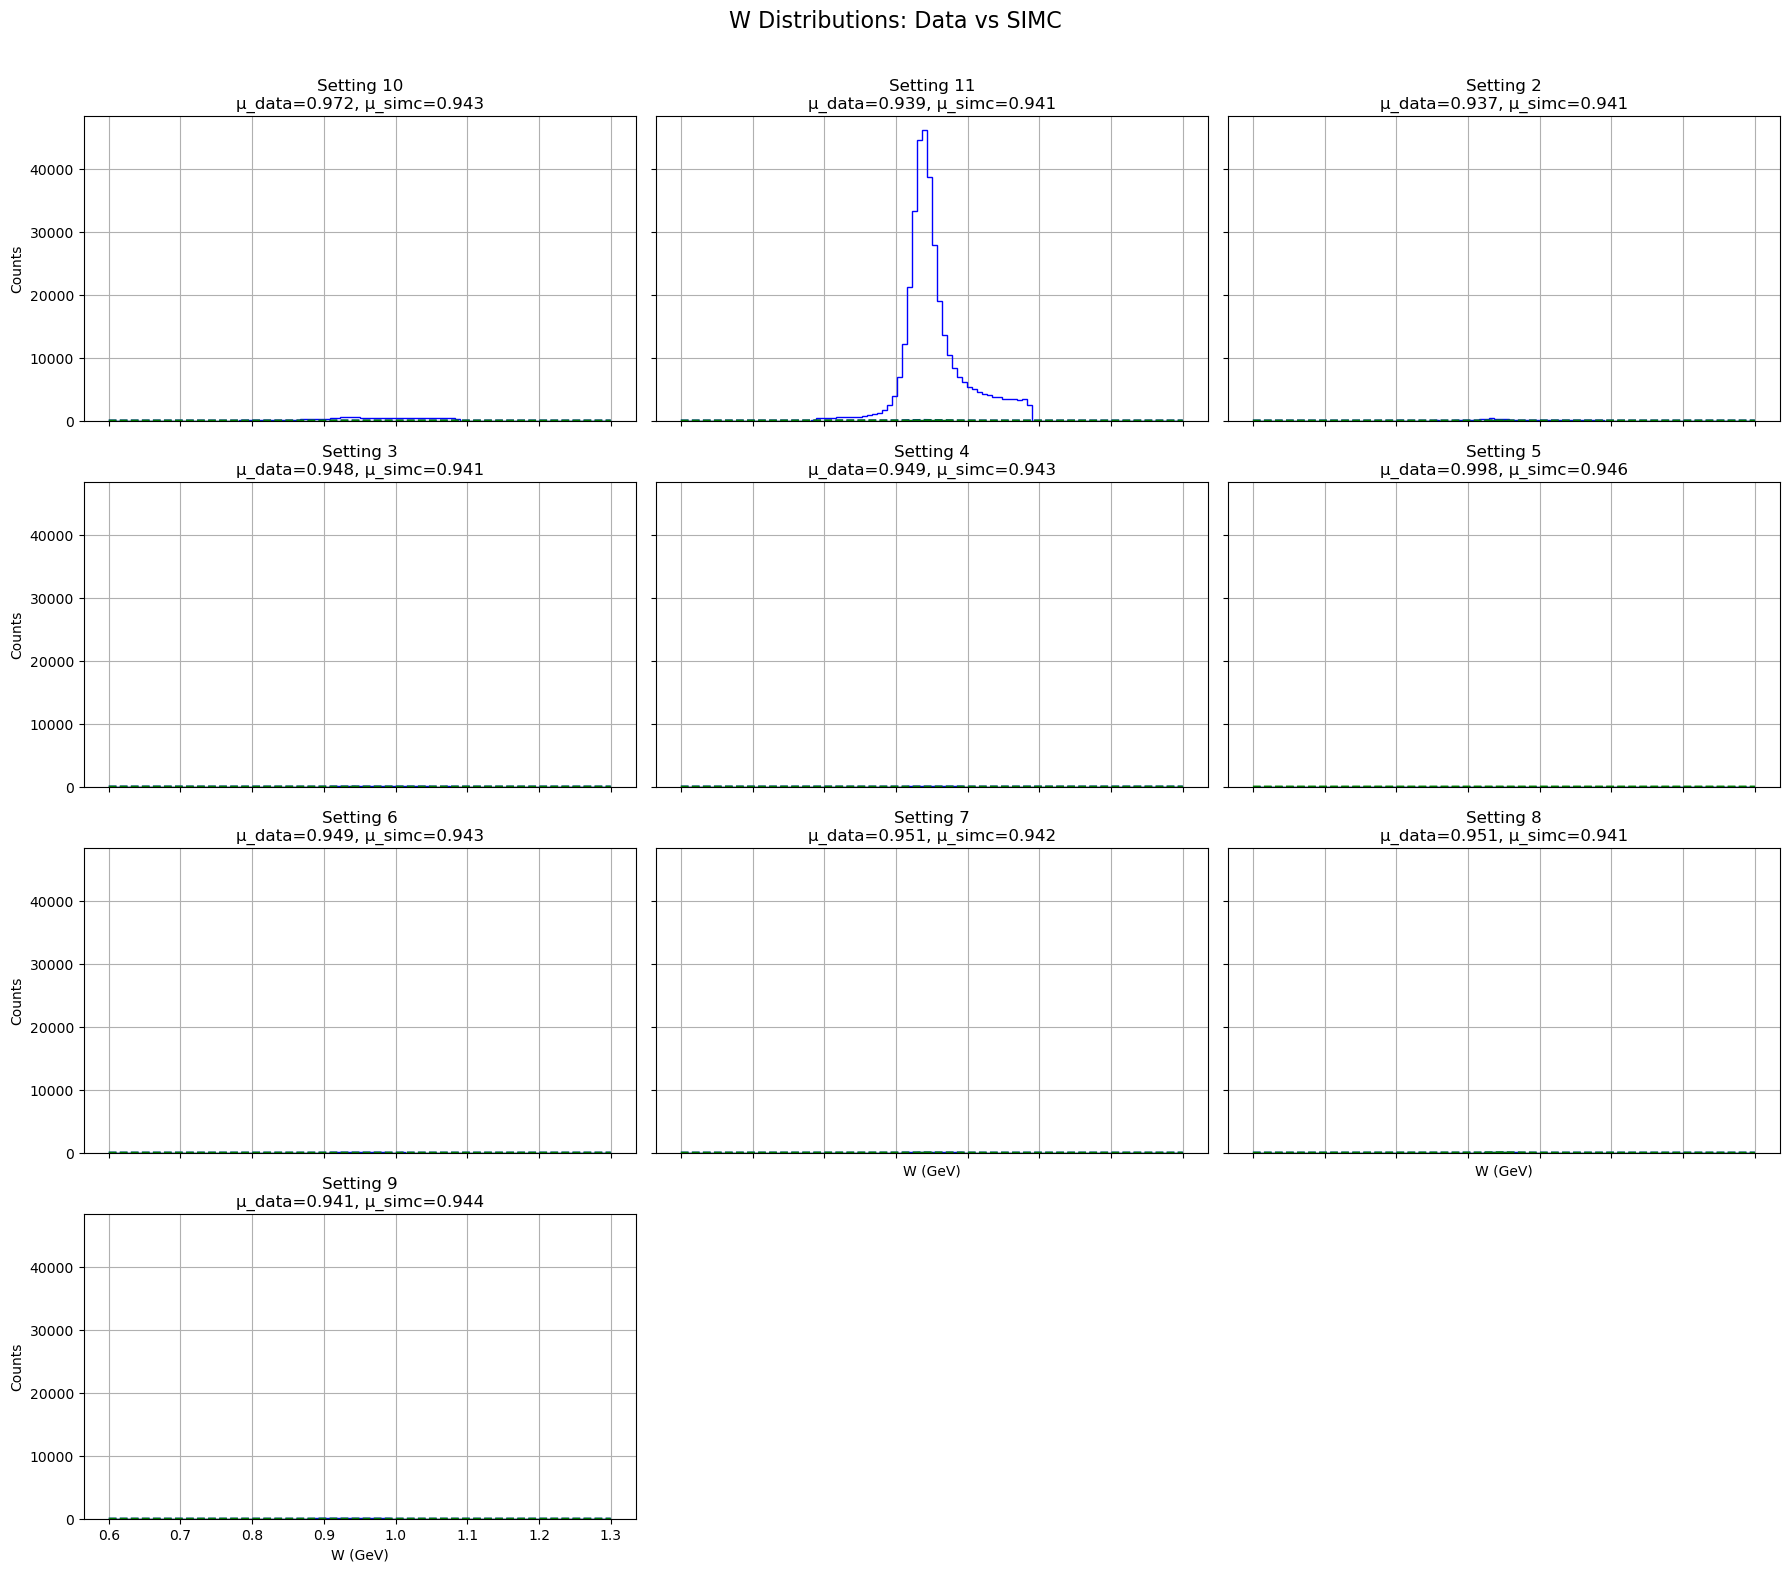

✅ Updated CSV saved to settings_with_kinematics.csv
✅ W diagnostic analysis complete.


,Setting,Runs,Beam_E_GeV,HMS_Angle_deg,HMS_P0_GeV,dW_meas,Residual,Proton_Angle_deg,Proton_P_GeV,Electron_P_GeV,mu_data,mu_simc,dWmeas,sigma_data,sigma_simc
0,1,1249,10.543868,12.395,6.117,NaN,NaN,36.961912,2.982732,8.355313,NaN,NaN,NaN,NaN,NaN
1,2,1250,10.543648,19.260,6.117,NaN,NaN,25.715849,4.920539,6.472723,0.936915,0.940940,-0.004026,0.018948,0.017173
2,3,1251,10.543302,19.260,6.117,NaN,NaN,25.716524,4.920319,6.472593,0.947823,0.940940,0.006884,0.024242,0.017173
3,4,1252,10.543469,20.700,6.117,NaN,NaN,24.106061,5.288494,6.110658,0.948964,0.942695,0.006269,0.030050,0.025912
4,5,1253,10.543532,22.120,6.117,NaN,NaN,22.688132,5.633526,5.770677,0.997596,0.945664,0.051931,0.101045,0.038989
5,6,1534,10.543719,19.145,6.667,NaN,NaN,25.852658,4.890434,6.502362,0.949286,0.943228,0.006059,0.028800,0.030434
6,7,1535,10.543667,17.995,6.667,NaN,NaN,27.297711,4.583160,6.803723,0.950793,0.941978,0.008815,0.024643,0.020926
7,8,1536,10.543632,16.850,6.667,NaN,NaN,28.886560,4.267684,7.112294,0.951209,0.940610,0.010599,0.023102,0.015762
8,9,1714,10.544022,22.830,5.878,NaN,NaN,22.033810,5.799436,5.607448,0.941034,0.944345,-0.003311,0.034747,0.036734
9,10,"1715, 1716",10.544000,21.680,5.878,NaN,NaN,23.110141,5.528918,5.874305,0.972154,0.942932,0.029222,0.084048,0.026186


In [14]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
import pandas as pd

# === Settings ===
data_dir = "./data/merged_elastics"
simc_dir = "./data/simc"
output_dir = "diagnostic_plots"
settings_csv_path = "settings_with_kinematics.csv"
os.makedirs(output_dir, exist_ok=True)

# === Gaussian Fit ===
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fit_gaussian(hist_vals, bin_edges):
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    A0 = np.max(hist_vals)
    mu0 = bin_centers[np.argmax(hist_vals)]
    sigma0 = np.std(bin_centers)
    try:
        popt, _ = curve_fit(gauss, bin_centers, hist_vals, p0=[A0, mu0, sigma0])
        return popt
    except RuntimeError:
        return None

# === W Extractor ===
def extract_w(filename, branch="W", normalize=False, normfac=None):
    with uproot.open(filename) as f:
        if branch == "H.kin.W":
            tree = f["T"]
            data = tree.arrays([branch, "H.cal.etottracknorm", "H.cer.npeSum", "H.gtr.th", "H.gtr.ph"], library="np")
            W = data[branch]
            mask = (
                (abs(W - 0.938) < 0.15) &
                (data["H.cal.etottracknorm"] > 0.9) &
                (data["H.cer.npeSum"] > 0.5) &
                (abs(data["H.gtr.th"]) < 0.09) &
                (abs(data["H.gtr.ph"]) < 0.055)
            )
            return W[mask]

        elif branch == "W":
            tree = f["h10"]
            simc = tree.arrays(["W", "hsxptar", "hsyptar", "Weight"], library="np")
            W = simc["W"]
            weights = simc["Weight"]
            mask = (
                (abs(W - 0.938) < 0.15) &
                (abs(simc["hsxptar"]) < 0.09) &
                (abs(simc["hsyptar"]) < 0.055)
            )
            W_sel = W[mask]
            Weights_sel = weights[mask]
            if normalize and normfac:
                return W_sel, Weights_sel * (normfac / nevents_simc)
            else:
                return W_sel

# === Analysis ===
results = []
bins = 100
range_W = (0.6, 1.3)
all_data = sorted(glob.glob(f"{data_dir}/merged_setting_*.root"))

ncols = 3
nrows = int(np.ceil(len(all_data) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4), sharex=True, sharey=True)
axs = axs.flatten()

for i, data_file in enumerate(all_data):
    setting = os.path.basename(data_file).split("_")[-1].replace(".root", "")
    if not setting.isdigit():
        print(f"Invalid setting format: {setting}")
        continue
    setting_int = int(setting)

    if setting_int not in setting_to_simcfile:
        print(f"Skipping setting {setting_int}: SIMC mapping not found.")
        continue
    simc_file = os.path.join(simc_dir, setting_to_simcfile[setting_int])
    if not os.path.exists(simc_file):
        print(f"Skipping setting {setting_int}: SIMC file not found.")
        continue

    # Extract and histogram
    data_W = extract_w(data_file, "H.kin.W")
    simc_result = extract_w(simc_file, "W", normalize=True, normfac=normfac_map.get(setting_int))
    simc_W, simc_weights = simc_result if isinstance(simc_result, tuple) else (simc_result, np.ones_like(simc_result))

    if len(data_W) == 0 or len(simc_W) == 0:
        print(f"No W entries for setting {setting_int}")
        continue

    hist_data, bins_data = np.histogram(data_W, bins=bins, range=range_W)
    hist_simc, _ = np.histogram(simc_W, bins=bins, range=range_W, weights=simc_weights)

    if setting_int in effective_charge_map:
        hist_data = hist_data / effective_charge_map[setting_int]

    fit_data = fit_gaussian(hist_data, bins_data)
    fit_simc = fit_gaussian(hist_simc, bins_data)
    if fit_data is None or fit_simc is None:
        print(f"Fit failed for setting {setting_int}")
        continue

    A_d, mu_d, sig_d = fit_data
    A_s, mu_s, sig_s = fit_simc
    dW = mu_d - mu_s

    results.append({
        "setting": setting_int,
        "mu_data": mu_d,
        "mu_simc": mu_s,
        "dWmeas": dW,
        "sigma_data": sig_d,
        "sigma_simc": sig_s
    })

    # Plot
    xfit = np.linspace(*range_W, 500)
    ax = axs[i]
    ax.hist(data_W, bins=bins, range=range_W, histtype='step', color='blue', label='Data')
    ax.hist(simc_W, bins=bins, range=range_W, weights=simc_weights, histtype='step', color='green', label='SIMC')
    ax.plot(xfit, gauss(xfit, *fit_data), 'b--')
    ax.plot(xfit, gauss(xfit, *fit_simc), 'g--')
    ax.set_title(f"Setting {setting_int}\nμ_data={mu_d:.3f}, μ_simc={mu_s:.3f}")
    ax.grid(True)
    if i % ncols == 0:
        ax.set_ylabel("Counts")
    if i >= len(all_data) - ncols:
        ax.set_xlabel("W (GeV)")

# Hide empty subplots
for j in range(len(results), len(axs)):
    axs[j].axis('off')

fig.suptitle("W Distributions: Data vs SIMC", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
plt.savefig(f"{output_dir}/W_comparison_all_settings.png")
plt.close()

# === Merge with CSV ===
df_results = pd.DataFrame(results)
df_results["Setting"] = df_results["setting"]
df_results.drop(columns=["setting"], inplace=True)

df_settings = pd.read_csv(settings_csv_path)
df_settings["Setting"] = df_settings["Setting"].astype(int)
fit_cols = ["mu_data", "mu_simc", "dWmeas", "sigma_data", "sigma_simc"]
df_settings.drop(columns=[col for col in fit_cols if col in df_settings.columns], inplace=True)

df_merged = pd.merge(df_settings, df_results, on="Setting", how="left")
df_merged.sort_values("Setting", inplace=True)
df_merged.to_csv(settings_csv_path, index=False)

print(f"✅ Updated CSV saved to {settings_csv_path}")
print("✅ W diagnostic analysis complete.")
df_merged

# Getting the offsets

## 🧠 Offset Extraction from Elastic Kinematics using Measured ΔW

### Objective

The goal of this analysis is to extract small systematic offsets in three key experimental quantities by comparing measured and simulated invariant mass \( W \) distributions for elastic electron-proton scattering:

- **Beam Energy Offset:** $ \delta E_i / E_i $
- **Scattered Electron Momentum Offset:** $ \delta E_f / E_f $
- **Electron Scattering Angle Offset:** $ \delta \theta $ (in radians)

These quantities are related to the measured shift in reconstructed $ W $ via first-order Taylor expansion of the theoretical expression of $ W $ in terms of kinematic inputs.

---

### Theoretical Framework

The shift in measured $ W $, denoted $ \delta W_{\text{meas}} = W_{\text{data}} - W_{\text{SIMC}} $, is approximated by:

$
\delta W_{\text{meas}} \approx \frac{\partial W}{\partial E_i} \cdot E_i \cdot \left( \frac{\delta E_i}{E_i} \right) +
\frac{\partial W}{\partial E_f} \cdot E_f \cdot \left( \frac{\delta E_f}{E_f} \right) +
\frac{\partial W}{\partial \theta} \cdot \delta \theta + \text{residual}
$

Each setting contributes one equation to an overconstrained system. The aim is to solve for the best-fit values of:

$
\vec{x} = \begin{bmatrix}
\delta E_i / E_i \\
\delta E_f / E_f \\
\delta \theta
\end{bmatrix}
$

---

### Derivatives Used

Given the elastic scattering kinematics (at $W = M_p$), the derivatives are defined as:

- $ \frac{\partial W}{\partial E_i} = \frac{E_f}{E_i} $
- $ \frac{\partial W}{\partial E_f} = -\frac{E_i}{E_f} $
- $ \frac{\partial W}{\partial \theta} = -\frac{E_i E_f \sin\theta}{m_p} $,  
  where $\theta $ is the electron scattering angle in **radians**, and  
  $ \sin^2(\theta/2) = \frac{m_p (E_i - E_f)}{2 E_i E_f} $

---

### Construction of the Linear System

We construct a system:

$
A \cdot \vec{x} = \vec{b}
$

Where:
- $ A $ is an $ N \times 3 $ matrix (N = number of valid settings), with rows:
  $
  \left[
  \frac{\partial W}{\partial E_i} \cdot E_i,
  \frac{\partial W}{\partial E_f} \cdot E_f,
  \frac{\partial W}{\partial \theta}
  \right]
  $
- $ \vec{b} $ is the vector of measured $ \delta W_{\text{meas}} $

---

### Solving the System

We solve using **least squares regression**:

$
\vec{x} = (A^T A)^{-1} A^T \vec{b}
$

This accounts for the overconstrained nature of the system. The residuals can be calculated as:

$
\vec{r} = \vec{b} - A \cdot \vec{x}
$

Other methods include:

    1. QR decomposition
    2. Singular value decomposition
    3. Convex optimization
    4. Lagrange multiplier


---

### Results and Interpretation

- The fitted parameters $ \vec{x} $ indicate the systematic shifts needed to align data with simulation.
- The residual norm gives insight into the goodness of the fit.
- Additional plots show:
  - Contribution of each parameter per setting (heatmap of matrix $ A $)
  - Comparison of predicted vs measured $ \delta W $
  - Residuals (unexplained differences)

---

### Example Use Cases

This method is essential when:
- Calibration of energy/angle is crucial (e.g., elastic scattering or form factor experiments)
- Validating simulation alignment with real data
- Estimating systematic uncertainties in kinematic reconstruction

---


=== Fitted Offsets ===
dEi / Ei     = -1.08717e-02
dEf / Ef     = -2.65186e-03
dtheta (rad) = -2.19042e-03

Residual norm: 0.04720495088970961


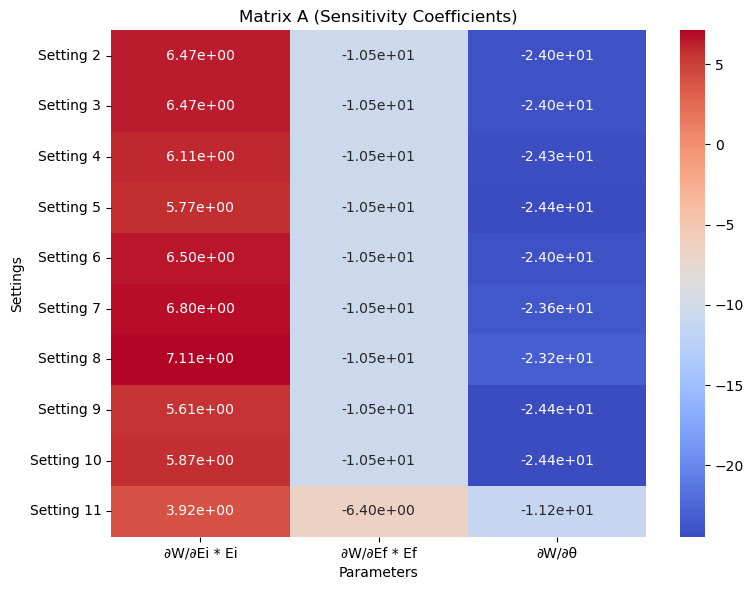

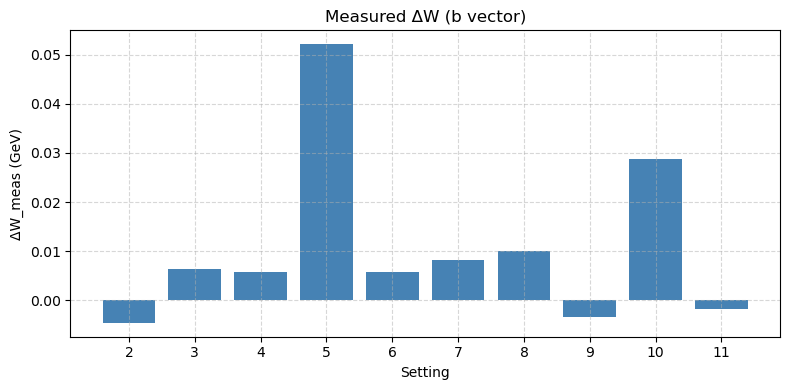

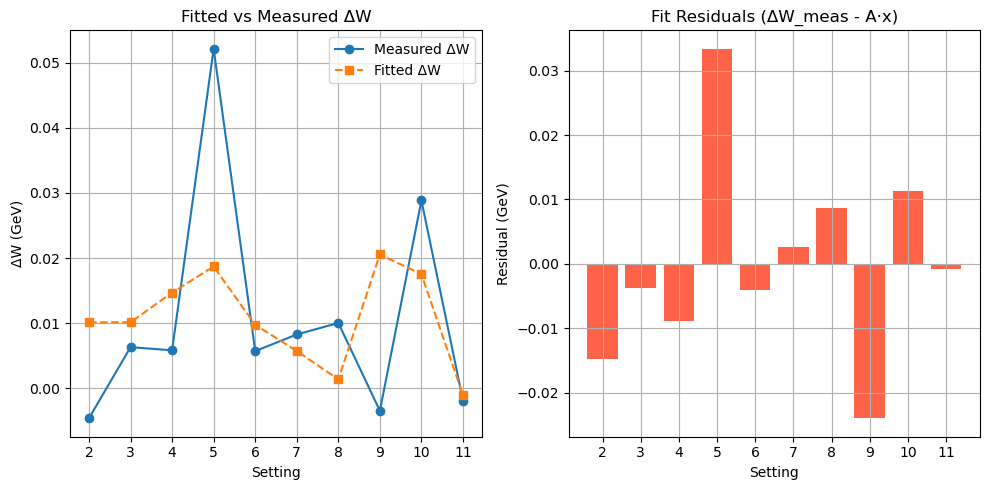

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
mp = 0.938272  # Proton mass in GeV

# Load CSV
df = pd.read_csv("settings_with_kinematics.csv")

# Filter valid rows
df_valid = df.dropna(subset=["mu_data", "mu_simc", "Electron_P_GeV", "HMS_Angle_deg"])

# Initialize matrices
A = []
b = []

for _, row in df_valid.iterrows():
    Ei = row["Beam_E_GeV"]
    Ef = row["Electron_P_GeV"]
    theta_deg = row["HMS_Angle_deg"]
    dWmeas = row["mu_data"] - row["mu_simc"]

    # Convert angle to radians
    theta_rad = np.radians(theta_deg)

    # Derivatives
    dW_dEi = Ef / Ei
    dW_dEf = -Ei / Ef

    # sin^2(theta/2) from kinematics
    sin2_half = (mp * (Ei - Ef)) / (2 * Ei * Ef)
    sin_half = np.sqrt(sin2_half)
    sin_theta = 2 * sin_half * np.sqrt(1 - sin2_half)  # sinθ = 2sin(θ/2)cos(θ/2)

    dW_dtheta = -Ei * Ef * sin_theta / mp

    A.append([dW_dEi * Ei, dW_dEf * Ef, dW_dtheta])
    b.append(dWmeas)

A = np.array(A)
b = np.array(b)

# Solve overconstrained system with least squares
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("=== Fitted Offsets ===")
print(f"dEi / Ei     = {x[0]:+.5e}")
print(f"dEf / Ef     = {x[1]:+.5e}")
print(f"dtheta (rad) = {x[2]:+.5e}")
print()
print("Residual norm:", np.linalg.norm(A @ x - b))

# Column labels
param_labels = ["∂W/∂Ei * Ei", "∂W/∂Ef * Ef", "∂W/∂θ"]

# 1. --- Matrix A heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(A, annot=True, fmt=".2e", cmap="coolwarm", xticklabels=param_labels,
            yticklabels=[f"Setting {int(s)}" for s in df_valid["Setting"]])
plt.title("Matrix A (Sensitivity Coefficients)")
plt.xlabel("Parameters")
plt.ylabel("Settings")
plt.tight_layout()
plt.savefig("diagnostic_plots/matrix_A_heatmap.png")
plt.show()


# 2. --- Vector b plot ---
plt.figure(figsize=(8, 4))
plt.bar(range(len(b)), b, color='steelblue')
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.title("Measured ΔW (b vector)")
plt.xlabel("Setting")
plt.ylabel("ΔW_meas (GeV)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("diagnostic_plots/b_vector_plot.png")
plt.show()


# 3. --- Fitted vs Measured ---
predicted_b = A @ x
residuals = b - predicted_b

plt.figure(figsize=(10, 5))

# Fitted vs Measured
plt.subplot(1, 2, 1)
plt.plot(b, 'o-', label="Measured ΔW")
plt.plot(predicted_b, 's--', label="Fitted ΔW")
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.xlabel("Setting")
plt.ylabel("ΔW (GeV)")
plt.title("Fitted vs Measured ΔW")
plt.legend()
plt.grid(True)

# Residuals
plt.subplot(1, 2, 2)
plt.bar(range(len(b)), residuals, color='tomato')
plt.xticks(range(len(b)), [f"{int(s)}" for s in df_valid["Setting"]])
plt.xlabel("Setting")
plt.ylabel("Residual (GeV)")
plt.title("Fit Residuals (ΔW_meas - A·x)")
plt.grid(True)

plt.tight_layout()
plt.savefig("diagnostic_plots/residuals_comparison.png")
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
mp = 0.938  # GeV (proton mass)

# Load CSV
df = pd.read_csv("settings_with_kinematics.csv")

# Drop rows with NaNs
df = df.dropna(subset=["Beam_E_GeV", "Electron_P_GeV", "HMS_Angle_deg", "dWmeas"])

# Extract needed columns
Ei = df["Beam_E_GeV"].values
Ef = df["Electron_P_GeV"].values
theta_deg = df["HMS_Angle_deg"].values
dWmeas = df["dWmeas"].values

theta_rad = np.radians(theta_deg)
sin_theta = np.sin(theta_rad)
sin2_half_theta = np.sin(theta_rad / 2)**2

# Compute derivatives
dW_dEi = Ef / Ei
dW_dEf = -Ei / Ef
dW_dtheta = -Ei * Ef * sin_theta / mp  # Using provided formula

# Construct matrix A and vector b
A = np.vstack((dW_dEi * Ei, dW_dEf * Ef, dW_dtheta)).T  # N x 3
b = dWmeas

# === 1. Least Squares ===
x_lstsq, residuals, _, _ = np.linalg.lstsq(A, b, rcond=None)

# === 2. QR Decomposition ===
Q, R = np.linalg.qr(A)
x_qr = np.linalg.solve(R, Q.T @ b)

# === 3. SVD ===
U, S, Vt = np.linalg.svd(A, full_matrices=False)
x_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# === 4. Convex Optimization (Minimize ||Ax - b||^2) ===
def objective(x): return np.linalg.norm(A @ x - b)**2
res_cvx = minimize(objective, np.zeros(3))
x_cvx = res_cvx.x

# === 5. Lagrange Multipliers (Equality-constrained least squares) ===
# Here, same as Least Squares for linear unconstrained case, shown for formality
# If needed: minimize ||Ax - b||^2 s.t. Cx = d
# But since we only have equality (Ax = b), we can solve (AᵀA)x = Aᵀb
x_lagrange = np.linalg.inv(A.T @ A) @ A.T @ b

# === Output All Methods ===
methods = {
    "Least Squares": x_lstsq,
    "QR Decomposition": x_qr,
    "SVD": x_svd,
    "Convex Optimization": x_cvx,
    "Lagrange Multipliers": x_lagrange,
}

results_df = pd.DataFrame(methods, index=["dEi/Ei", "dEf/Ef", "dtheta"])
results_df

# Optionally: Save to CSV
# results_df.to_csv("extracted_offsets_summary.csv")


,Least Squares,QR Decomposition,SVD,Convex Optimization,Lagrange Multipliers
dEi/Ei,-0.010872,-0.010872,-0.010872,-0.010874,-0.010872
dEf/Ef,-0.002652,-0.002652,-0.002652,-0.002650,-0.002652
dtheta,-0.002190,-0.002190,-0.002190,-0.002191,-0.002190


In [24]:
results_df["Least Squares"]

dEi/Ei   -0.010872
dEf/Ef   -0.002652
dtheta   -0.002190
Name: Least Squares, dtype: float64